In [3]:
import numpy as np # A variety of different software packages were used to implement the MRI model
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import interp
from scipy.interpolate import UnivariateSpline
from scipy.special import erf
%matplotlib nbagg

In [4]:
z = np.linspace(-5,5,1000)
z1 = [i * 1*10**-9 for i in z]
g_mri1 = []
Ns_m = []
for i in z1:
    w = 1*10**-9
    lam = 1*10**-9
    sig = 0.5*10**-9
    a = ((1/(2*w))*(1-np.exp(-w/lam))*np.exp(((-i-w)/w)+((sig**2)/(2*w**2))))
    b = (1 - erf((1/np.sqrt(2))*(((-i-w)/sig)+(sig/w))))
    c = ((1/(2*lam))*np.exp((i/lam)+((sig**2)/(2*lam**2))))
    d = (1 + erf((1/np.sqrt(2))*(((-i-w)/sig)-(sig/lam))))                                                              
    final = a*b*c*d
    g_mri1.append(final)
    N1,N1x,N2,N2x,N3 = SegFunc(5*10**-9,2*10**9,5*10**9,3*10**-9)#np.exp(a_1*i)*np.exp(a_2*i)
    N11 = np.array(N1)
    N22 = np.array(N2)
    N33 = np.concatenate((N11, N22))
    N331 = np.concatenate((N33,N3))
    N44 = np.concatenate((N1x, N2x))
    N_surf = np.exp(5*i)
Ns_m.append(N331)
#MRI_Ns = np.convolve(g_mri1,Ns_m)
print(np.shape(g_mri1))
print(np.shape(Ns_m))
N2 = np.array(Ns_m)
Ns111 = N2.reshape((1000,))
print(np.shape(Ns111))
MRI_Ns = np.convolve(g_mri1,Ns111)
#print(g_mri1)
#Ns_m1 = np.ndarray.flatten(g_mri1)
#print(Ns_m)
#print(g_mri1)
#MRI_Ns = np.convolve(Ns_m1,Ns_m)
#print(MRI_Ns)    
#print(np.max(g_mri1))
#gn = []
#for j in g_mri1:
#    f = j/5.1660669307963576e+16#np.max(g_mri1)
#    gn.append(f)   
#plt.plot(z,gn)
#plt.xlabel('z (nm)')
#plt.ylabel('Norm Intensity I/I0')

#plt.grid()

NameError: name 'SegFunc' is not defined

In [13]:

def MRIFunc(w,lam,sig): # MRI Function is defined, taking three input values w, lambda and sigma: a_ll
    z = np.linspace(-5,5,1000) # creates sequence of evenly 1000 evenly spaced values from -5 to 5
    #z2 = np.linspace(-10,10,1999) 
    z1 = [i * 1*10**-9 for i in z] # converts all z values in sequence into nanometres 
    g_mri1 = [] # defines an empty matrix for final mri intensity values

    
    Ns_m = []
    for i in z1: # loops through all the values in z1, inputting them into the analytical expression for the MRI
        a = ((1/(2*w))*(1-np.exp(-w/lam))*np.exp(((-i-w)/w)+((sig**2)/(2*w**2)))) 
        b = (1 - erf((1/np.sqrt(2))*(((-i-w)/sig)+(sig/w))))
        c = ((1/(2*lam))*np.exp((i/lam)+((sig**2)/(2*lam**2))))
        d = (1 + erf((1/np.sqrt(2))*(((-i-w)/sig)-(sig/lam))))                                                              
        final = (a*b)+(c*d)
        g_mri1.append(final) # the output of the equation is inputted into the empty MRI matrix
        MRI_Ns = g_mri1
    return(g_mri1)

def NormFunc(MRI_1, A): # Normalises the intensity scale 
        MRI_2 = (MRI_1/A)#*1.9506904999999997e+21
        return(MRI_2) 

<IPython.core.display.Javascript object>


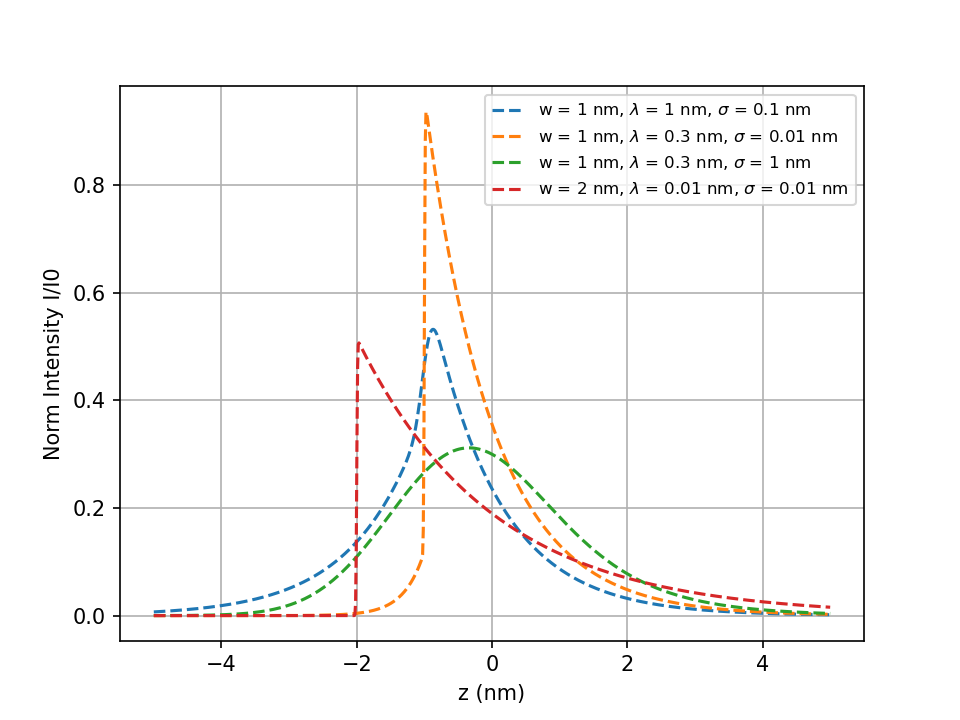

In [14]:
plt.figure() # plots an empty figure
z2 = np.linspace(-5,5,1000) # x axis depth values 
one = MRIFunc(1*10**-9, 1*10**-9, 0.1*10**-9)
onef = NormFunc(one,np.trapz(one,z2))
two = MRIFunc(1*10**-9, 0.3*10**-9, 0.01*10**-9)
twof = NormFunc(two,np.trapz(two,z2))
three = MRIFunc(1*10**-9, 0.3*10**-9, 1*10**-9)
threef = NormFunc(three,np.trapz(three,z2))
four = MRIFunc(2*10**-9, 0.01*10**-9, 0.01*10**-9)
fourf = NormFunc(four,np.trapz(four,z2))
ax = plt.subplot(111) # allows for multiple graph to be plot on the same figure
ax.plot(z2,onef, '--', label = 'w = 1 nm, $\lambda$ = 1 nm, $\sigma$ = 0.1 nm') # The MRI intensity is plot against z
ax.plot(z2,twof,'--', label = 'w = 1 nm, $\lambda$ = 0.3 nm, $\sigma$ = 0.01 nm')
ax.plot(z2,threef,'--', label = 'w = 1 nm, $\lambda$ = 0.3 nm, $\sigma$ = 1 nm')
ax.plot(z2,fourf,'--', label = 'w = 2 nm, $\lambda$ = 0.01 nm, $\sigma$ = 0.01 nm')
plt.xlabel('z (nm)')
plt.ylabel('Norm Intensity I/I0')
ax.legend(prop={'size': 8}) # creates legend 
plt.grid() # creates grid on figure 
plt.show()

In [ ]:
def SegFunc(Nt,a_l,a_c,L):
    z = np.linspace(-5,5,1000)
    z1 = [(i * 1*10**-9) for i in z]
    Nx1 = []
    Nx1_1 = []
    Nx2 = []
    Nx2_2 = []
    Nx3 = []
    Nx3_3 = []
    for i in z1:
        if 0<i<L:
            a = Nt*a_l*np.exp(-a_l*i)
            a_1 = i
            Nx1.append(a)
            Nx1_1.append(a_1)
            #return Nx1
        elif i>L:
            b = Nt*a_c*np.exp(-a_l*L)*np.exp(-a_c*(i-L))
            b_1 = i
            Nx2.append(b)
            Nx2_2.append(b_1)
            #return Nx2
        elif i<0:
            c = 0
            Nx3.append(c)

    return Nx1,Nx1_1,Nx2,Nx2_2,Nx3
        #else:
        #    c = 0
        #    Nx3.append(c)
        #    return Nx3
     #   if 0<i<L:   
     #       return Nt*a_l*np.exp(-a_l*i) 
     #   if i>L:
     #       return Nt*a_l*np.exp(-a_l*L)*np.exp(-a_c(i-L))
     #   if i<0:
     #       return 0

In [ ]:
A= [[ 1,  2],
   [ 3,  4]]
B= [[ 5,  6]]
np.concatenate((A, B))

<IPython.core.display.Javascript object>


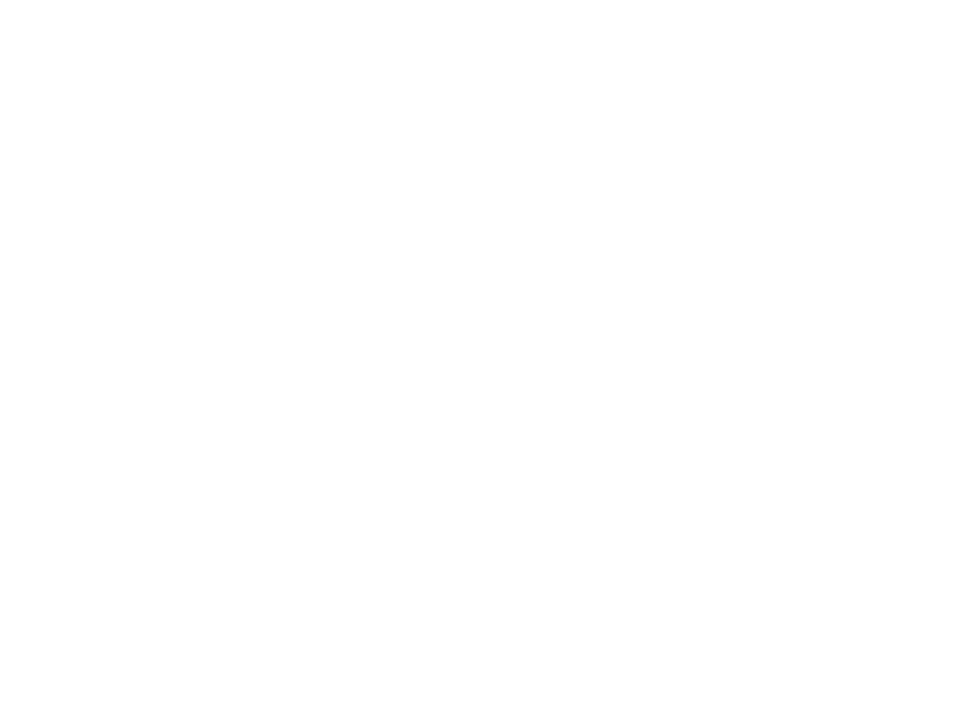

NameError: name 'SegFunc' is not defined

In [4]:
plt.figure()
N1,N1x,N2,N2x,N3 = SegFunc(5*10**-9,2*10**9,1*10**9,1*10**-9)
N11 = np.array(N1)
N22 = np.array(N2)
N33 = np.concatenate((N11, N22))
N44 = np.concatenate((N1x, N2x))
print(np.shape(N33))
plt.plot(N44,N33)

In [153]:
def SegFunc2(Nt,a_l,a_c,L):
    z2 = np.linspace(0,10,9)
    a1 = []
    for i in z2:
        a = Nt*a_l*np.exp(-a_l*i)
        a1.append(a)
    return a1

<IPython.core.display.Javascript object>


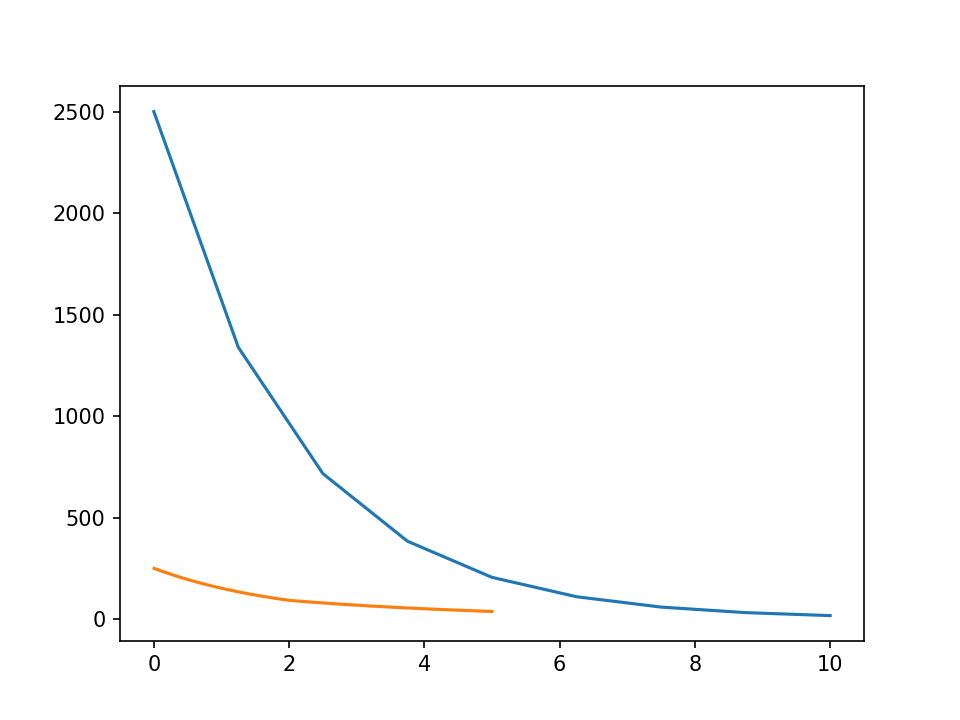

In [156]:
plt.figure()
A = SegFunc2(5000,0.5,0.3,10)
plt.plot(z2,A)

<IPython.core.display.Javascript object>


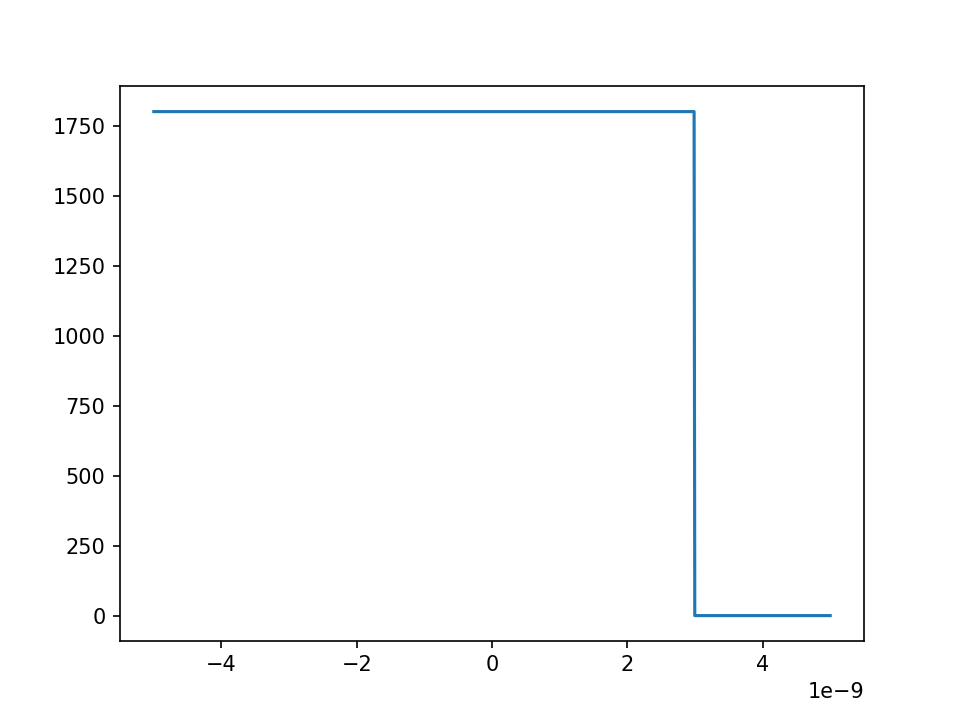

In [149]:
plt.figure()
N1,N2,N3 = SegFunc(2*10*9,10,0.5,4*10**-9) 
N1_1 = np.array(N1)
N1_11 = np.pad(N1_1, (0, 201), 'constant')
plt.plot(z1,N1_11)

In [78]:
def ExpFunc(a_ll):
    z = np.linspace(0,5,1000)
    z1 = [i * 1*10**-9 for i in z]
    Ns_m = []
    for i in z1:
        N_surf = np.exp(a_ll*i)
        Ns_m.append(N_surf)
    return(Ns_m)

In [7]:
#plt.figure()
#print(z1)
#x = np.exp(z1)
#print(z1*4)
#plt.plot(z1,x)

<IPython.core.display.Javascript object>


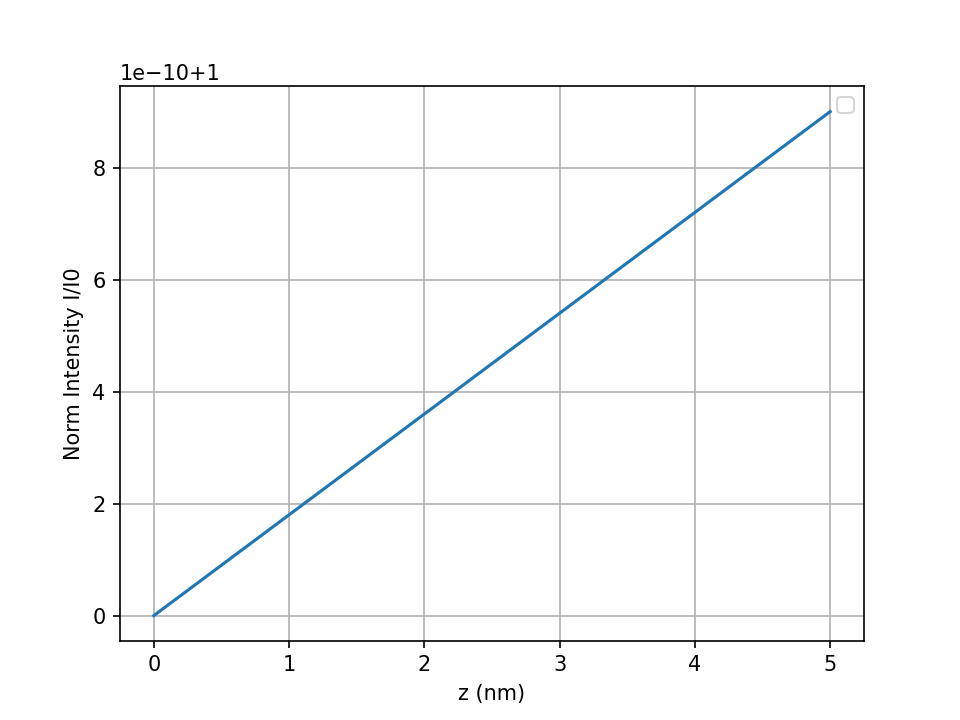

No handles with labels found to put in legend.


In [8]:
plt.figure()
z = np.linspace(0,5,1000)
z1 = [i * 1*10**-9 for i in z]
one = ExpFunc(0.18)
ax = plt.subplot(111)
ax.plot(z,one)
#ax.plot(z,two, label = 'w = 2, $\lambda$ = 0.01, $\sigma$ = 0.01')
#ax.plot(z,three, label = 'w = 0.01, $\lambda$ = 0.3, $\sigma$ = 1')
#ax.plot(z,four, label = '$\sigma$ = 1')
plt.xlabel('z (nm)')
plt.ylabel('Norm Intensity I/I0')
ax.legend()
plt.grid()
plt.show()

In [15]:
def MRI1Func(w,lam,sig):
    z = np.linspace(-5,5,1000)
    z2 = [i * 1*10**-9 for i in z]
    g_w1 = []
    g_s1 = []
    g_l1 = []
    for i in z2:
        g_w = (1/w)*np.exp(-(i+w)/w)
        g_s = (1/(sig*np.sqrt((2*np.pi))))*np.exp((-(i)**2)/(2*sig**2))
        g_l = (1/lam)*np.exp(i/lam)
        g_w1.append(g_w)
        g_s1.append(g_s)
        g_l1.append(g_l)
    one = np.convolve(g_w1,g_l1,'full')
    two = np.convolve(one, g_s1,'full')

    
    return(two)

In [29]:
#plt.figure()
#final = MRI1Func(0.1*10**-9, 5*10**-9, 0.3*10**-9) # w, lam, sig
#final2 = MRI1Func(5.7*10**-9, 1.53*10**-9, 0.3*10**-9)
#final3 = MRI1Func(0.01*10**-9, 1*10**-9, 0.01*10**-9)
#z3 = np.linspace(-5,5,2998)
#ax = plt.subplot(111)
#ax.plot(z3,final, label = '$\sigma$ = 0.01')
#ax.plot(z3,final2, label = '$\sigma$ = 0.25')
#ax.plot(z3,final3, label = '$\sigma$ = 0.25')
#plt.xlabel('z (nm)')
#plt.ylabel('Norm Intensity I/I0')
#ax.legend()
#plt.grid()
#plt.show()